# Large Magellanic Cloud Cepheid P-L Relation

Figure 11.2 from Chapter 11 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Mean I band apparent magnitude as a function of pulsation period P (in days) for a sample of Cepheids in the Large
Magellanic Cloud. Plot of the P-L relation for fundamental mode and first overtone pulsators.

Data are from Udalski et al. [1999, AcA, 49, 223](https://ui.adsabs.harvard.edu/abs/1999AcA....49..223U), extracted from the 
[electronic data tables in the VizieR database](https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/AcA/49/223).


In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig11_2.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## VizieR LMC Cepheid Data

Data were extracted from the online tables in the VizieR [J/AcA/49/223/lmc_scJ/AcA/49/223](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/AcA/49/223/lmc_sc). The plain-text files generated were edited for easier reading using pandas.
Data extracted were:
 * Field - OGLE Field ID
 * Seq - sequence number in Field
 * Per - period in days
 * Imag - mean I-band magnitude
 * Type - Cepheid type
 
The types are
 * FU: classical Cepheid pulsating in the fundamental mode
 * FO: classical Cepheid pulsating in the first overtone
 * BR: object brighter than FO mode Cepheids
 * FA: object fainter than FU mode Cepheids
 
We plot FU and FO types only.

The data were extracted as `ascii text/plain` format, then edited to clean up the data header and comments
to make it easier to read with the pandas `read_csv()` method.

In [3]:
from astropy.time import Time

dataFile = 'LMC_Cepheids_OGLE.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

types = np.array(data['Type'])
allPeriods = np.array(data['Per'])
allImags = np.array(data['Imag'])

fuP = allPeriods[np.where(types=='FU')]
fuI = allImags[np.where(types=='FU')]

foP = allPeriods[np.where(types=='FO')]
foI = allImags[np.where(types=='FO')]

# axis limits

minI = 18 # faint
maxI = 12 # bright

minP = 0.3 # days
maxP = 40 # days

## Figure 11.2

Plot mean I band apparent magnitude as a function of pulsation period P (in days).
 * Black points: Cepheids pulsating at their fundamental mode. 
 * Gray points: Cepheids pulsating at their first overtone.

Period is plotted on a logarithmic scale from 0.3 to 40 days.

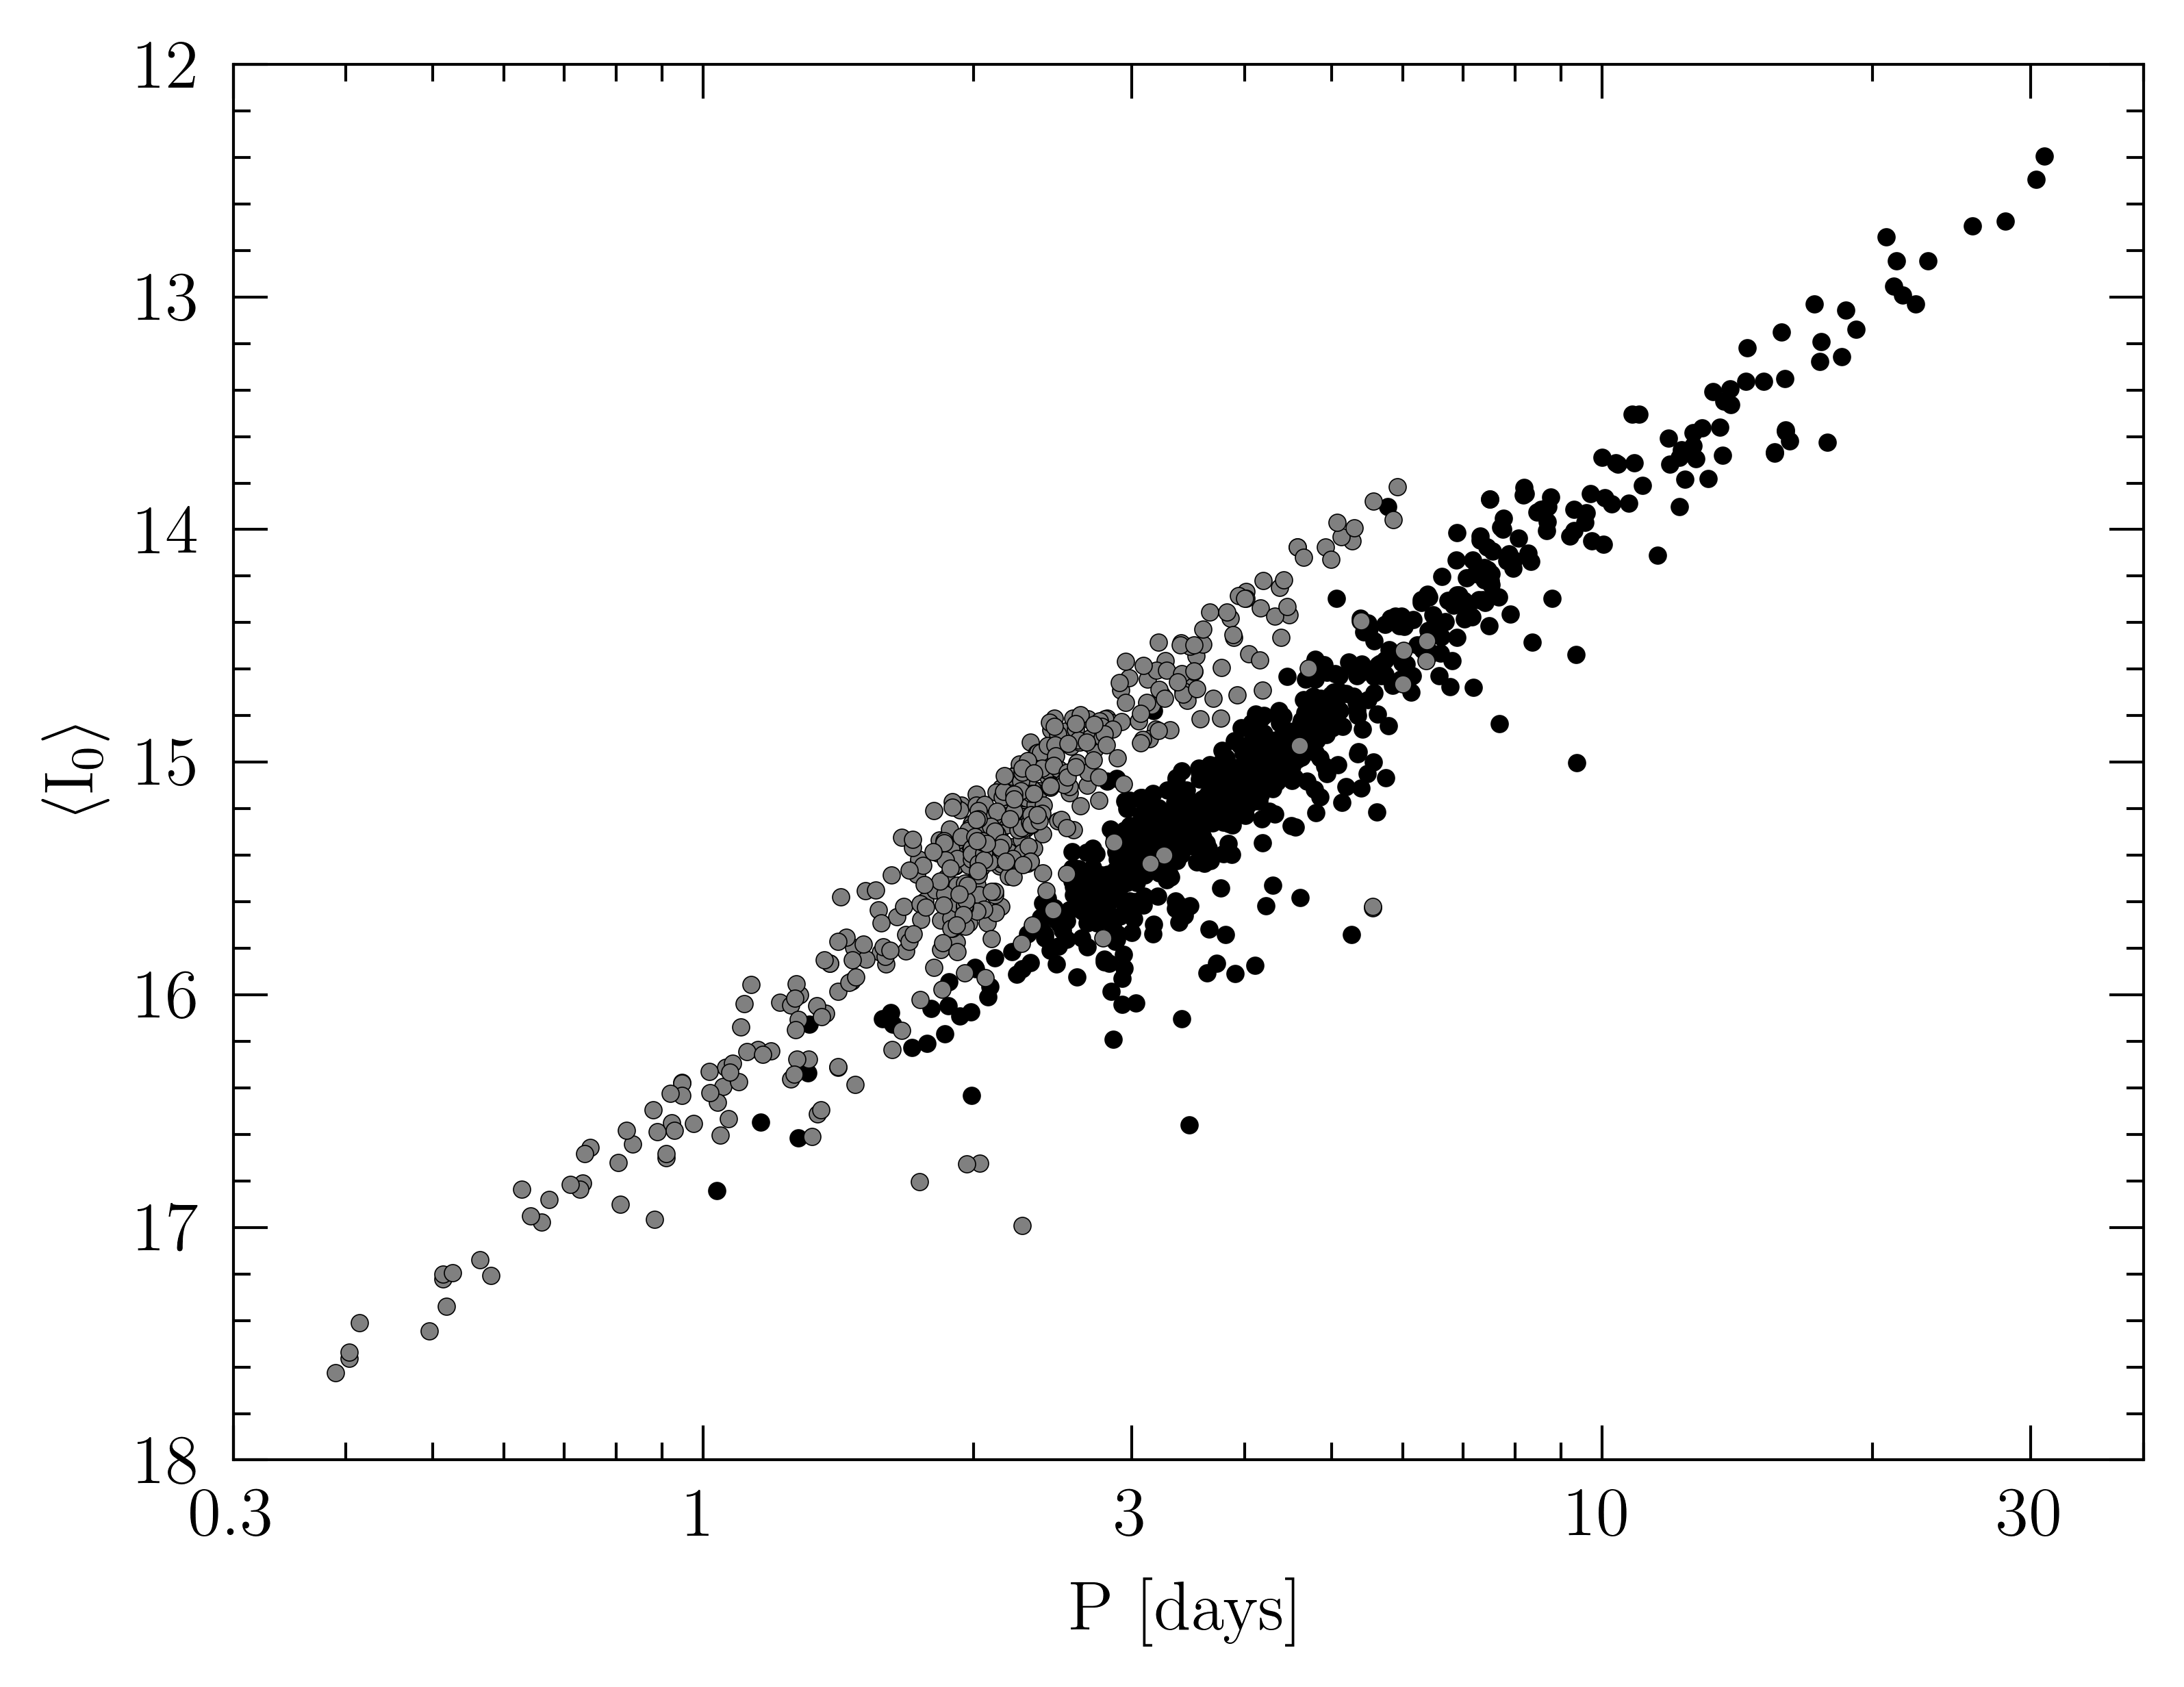

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minP,maxP)
ax.set_xscale('log')
ax.set_xlabel(r'P [days]',fontsize=axisFontSize)
ax.set_xticks([0.3,1,3,10,30])
ax.set_xticklabels(['0.3','1','3','10','30'])

ax.set_ylim(minI,maxI)
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_ylabel(r'$\langle {\rm I}_0\rangle$',fontsize=axisFontSize)

plt.plot(fuP,fuI,'o',ms=3,mfc='black',mec='black',mew=0.2,zorder=10)
plt.plot(foP,foI,'o',ms=3,mfc='gray',mec='black',mew=0.2,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')